<a href="https://colab.research.google.com/github/abdullahkhafabi-010/PCVK/blob/main/Kuis2/Kelompok_9_Kuis2_Praktikum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Kelompok 9**

**Nama Anggota :**

1. Abdullah Khafabi / 2041720050 (01)

7. Alfan Farchi Al-Hadi / 2141720084 (07)

10. Arhan Windu Rizki Putra Budianto / 2141720227 (10)

# Kuis 2 - Praktikum (3A)
Silakan mengerjakan pertanyaan di bawah ini dengan benar dan jujur.

1. Mengerjakan secara kelompok yang terdiri dari 3 anggota
2. Kumpulkan e-ktp anggota keluarga pada kelompok minimal 9 buah sebagai dataset.
3. deteksi dan kenali foto wajah e-ktp tersebut menggunakan metode yang telah dipelajari baik pada matakulilah PCVK ataupun matakuliah lain pada semester ini.
4. Presentasikan di depan kelas hasil dari pekerjaan kelompok Anda, paparkan hasil dari pekerjaan tersebut secara detail lengkap dengan tangkapan layar bagian dari;
  1. pre-processing,
  2. lokalisasi,
  3. segmentasi, dan
  4. pengenalan.
5. jangan lupa upload juga kode program tersebut pada repository
6. kumpulkan link file presentasi dalam bentuk pdf dan link repository.

Selamat mengerjaan, semua anggota kelompok wajib saling berkontribusi.

In [1]:
from google.colab import drive
drive.mount('/content/MyDrive')

Mounted at /content/MyDrive


In [7]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os

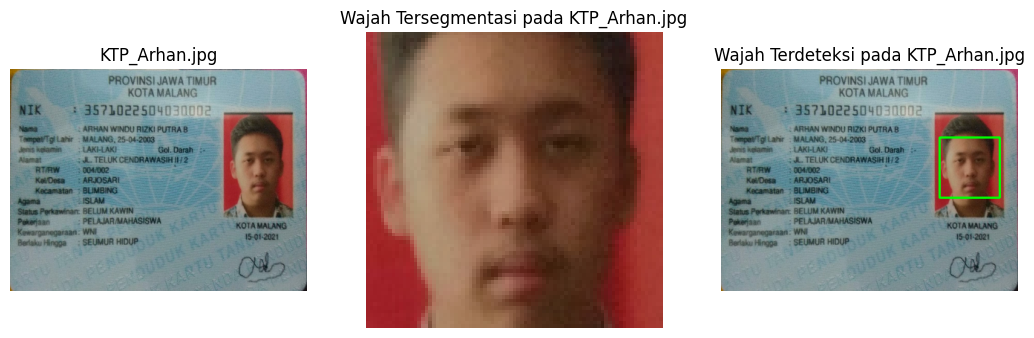

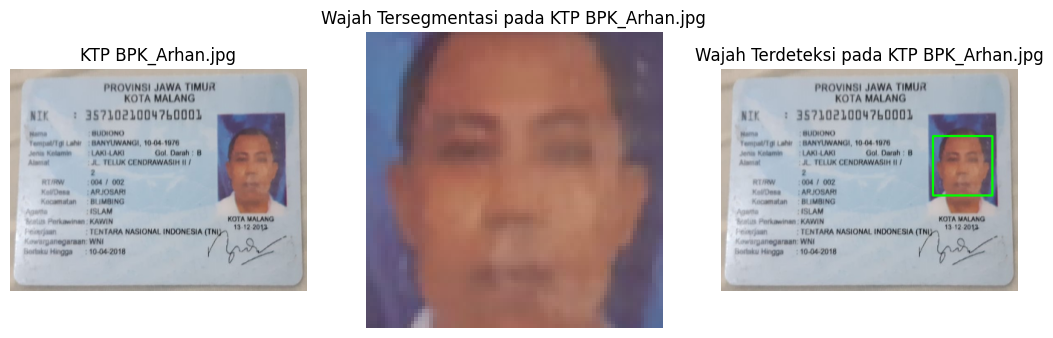

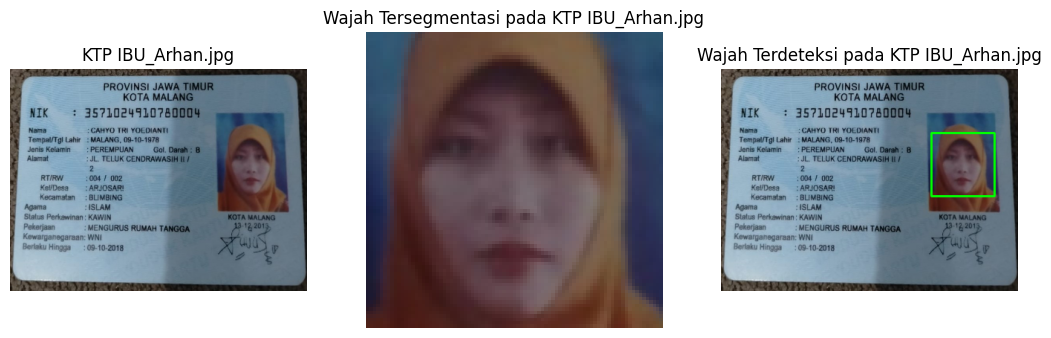

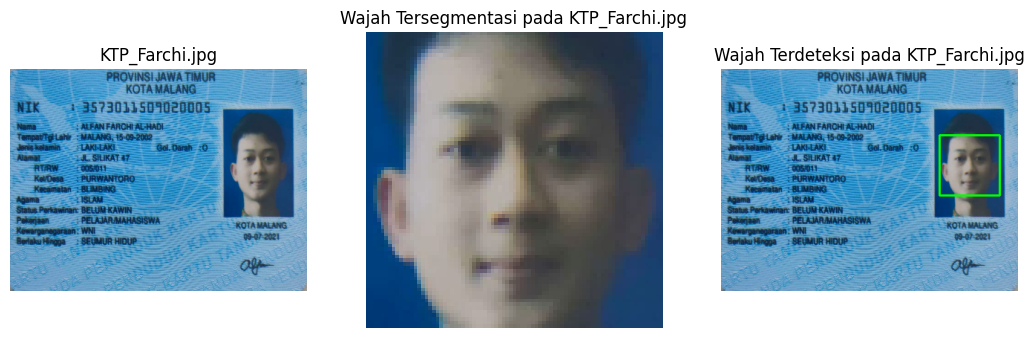

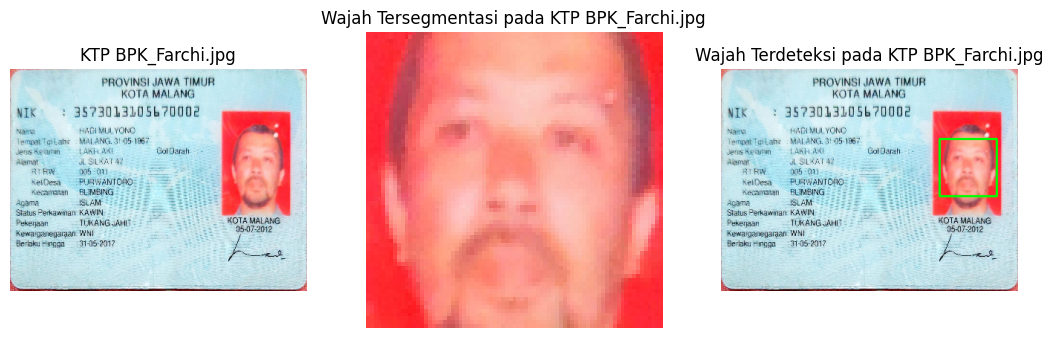

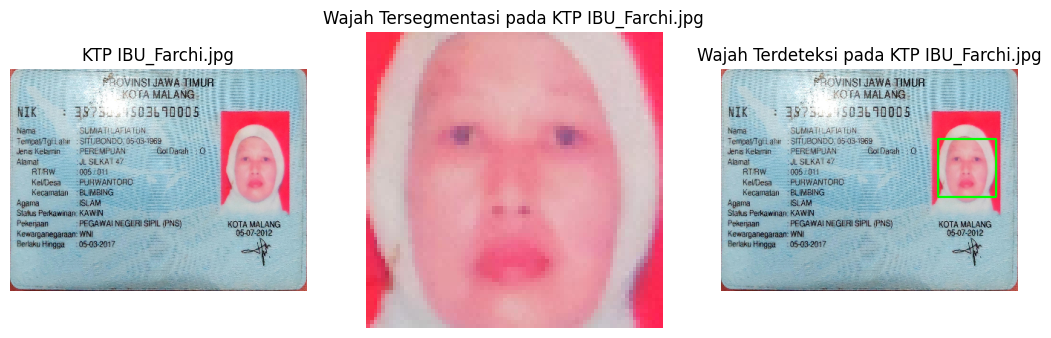

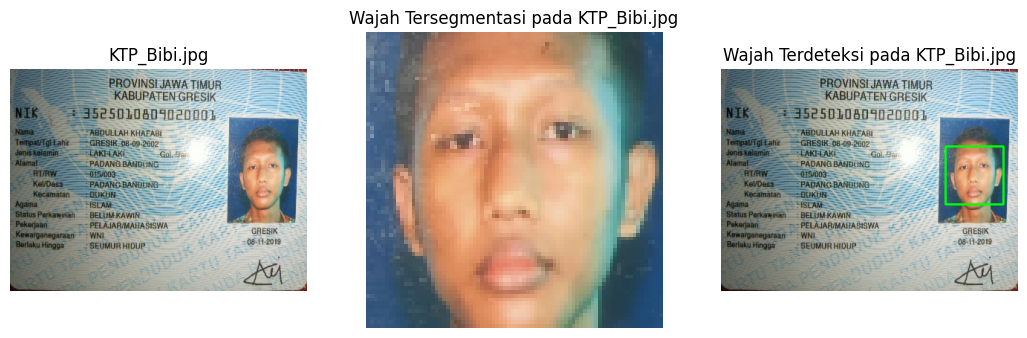

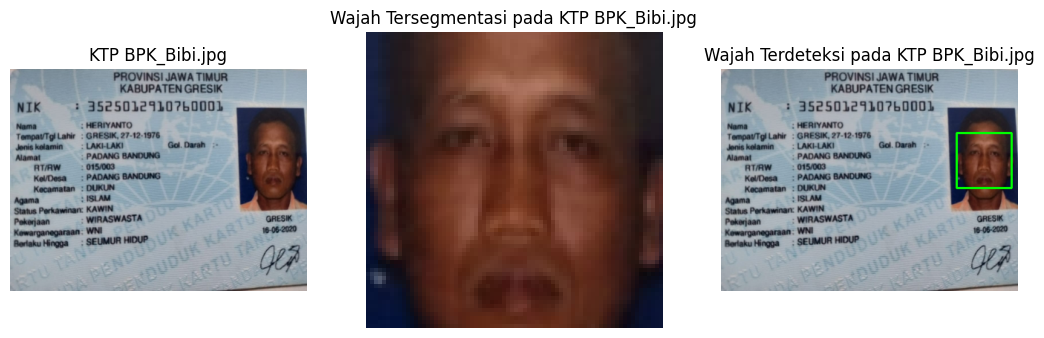

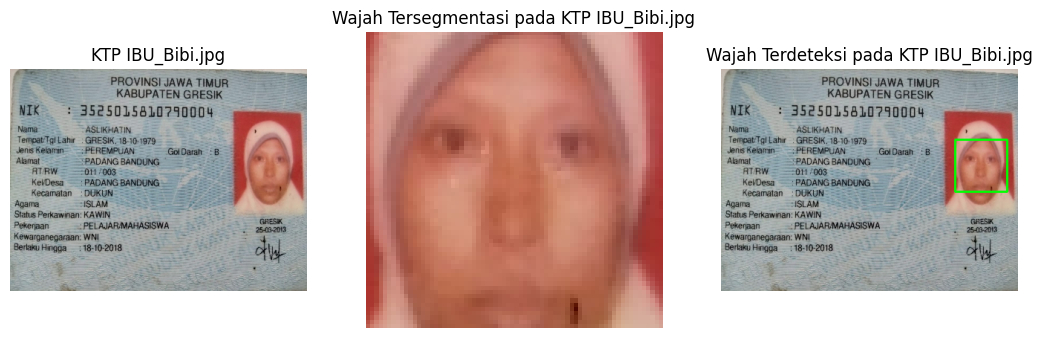

In [14]:
# Path ke direktori ktp
ktp_dir = '/content/MyDrive/MyDrive/KTP'

# Membaca cascade
cascade_wajah = cv.CascadeClassifier('/content/MyDrive/MyDrive/KTP/haarcascade_frontalface_alt.xml')

# Daftar file ktp dalam direktori
ktp_files = [
    'KTP_Arhan.jpg',
    'KTP BPK_Arhan.jpg',
    'KTP IBU_Arhan.jpg',
    'KTP_Farchi.jpg',
    'KTP BPK_Farchi.jpg',
    'KTP IBU_Farchi.jpg',
    'KTP_Bibi.jpg',
    'KTP BPK_Bibi.jpg',
    'KTP IBU_Bibi.jpg',
]

# Direktori tempat ktp disimpan
ktp_dir = '/content/MyDrive/MyDrive/KTP'

# Looping untuk setiap ktp di direktori
for i, ktp_file in enumerate(ktp_files, start=1):
    # Baca ktp
    ktp_path = os.path.join(ktp_dir, ktp_file)
    img = cv.imread(ktp_path)

    # PRE-PROCESSING (dari resize sampai equalization)
    # Mengubah besar img
    img = cv.resize(img, (400, 300))

    # Konversi ktp ke grayscale
    img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

    # Histogram Equalization
    equalized_img = cv.equalizeHist(img_gray)

    # Deteksi wajah (LOKALISASI)
    roi_wajah = cascade_wajah.detectMultiScale(img_gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # Gambar kotak di sekitar wajah pada ktp berwarna
    for (x, y, w, h) in roi_wajah:
        face_segment = img[y:y+h, x:x+w]

        # Menampilkan gambar ktp dan segmentasi wajah
        plt.figure(figsize=(13, 10))

        plt.subplot(131)
        plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
        plt.title(f'{ktp_file}')
        plt.axis('off')

        plt.subplot(132)
        plt.imshow(cv.cvtColor(face_segment, cv.COLOR_BGR2RGB))
        plt.title(f'Wajah Tersegmentasi pada {ktp_file}')
        plt.axis('off')

        # Menampilkan gambar ktp dengan pengenalan / identifikasi kotak wajah
        img_faces = img.copy()
        cv.rectangle(img_faces, (x, y), (x + w, y + h), (0, 255, 0), 2)

        plt.subplot(133)
        plt.imshow(cv.cvtColor(img_faces, cv.COLOR_BGR2RGB))
        plt.title(f'Wajah Terdeteksi pada {ktp_file}')
        plt.axis('off')

        plt.show()